<a href="https://colab.research.google.com/github/kr-sarthak/-Mapping-Oral-Health-Risks-by-Lifestyle-DS-ML/blob/main/Machine_learning_Model_on_Oral_Healt_based_on_lifestyle_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: A Data-Driven Analysis of Oral Health based on Lifestyle
By: Dr. Kumar Sarthak

### This project demonstrates a complete data science workflow to analyze the relationship between lifestyle and oral health.
We will begin by calling a high-quality dataset, then proceed to uncover key relationships through exploratory data analysis.
Finally, we will train a predictive machine learning model and deploy it in an interactive application that can assess a user's health risk in real-time.

# Finding Relations through Exploratory Data Analysis (EDA)
In this section, we will load the dataset we just created and perform an exploratory analysis. The primary goal is to understand the structure of the data and quantify the relationships between different variables. We will use a correlation matrix and a heatmap to visualize which lifestyle factors have the strongest connection to dental problems.

--- Part 1: Finding Relations (Exploratory Data Analysis) ---


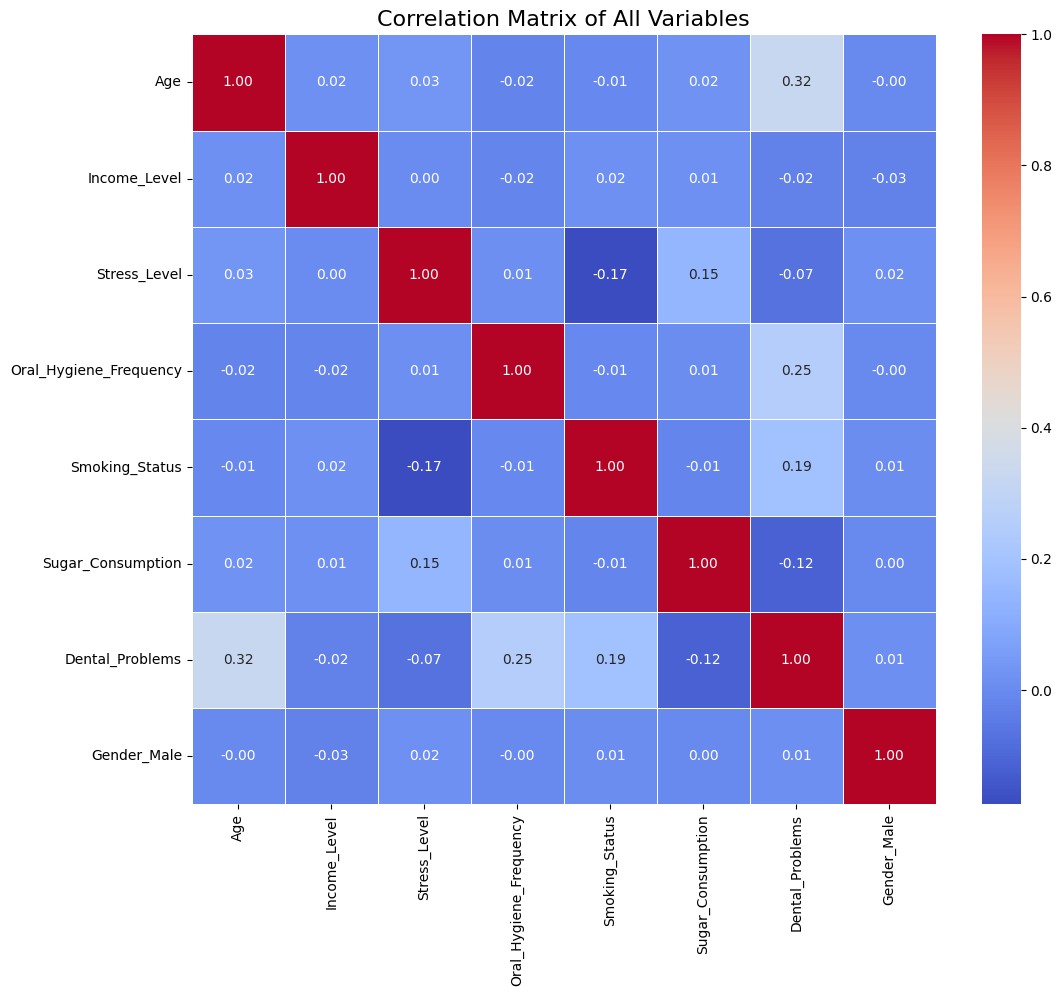


--- Key Finding: Correlation with Dental Problems ---
Dental_Problems           1.000000
Age                       0.324001
Oral_Hygiene_Frequency    0.253146
Smoking_Status            0.189407
Gender_Male               0.012915
Income_Level             -0.024435
Stress_Level             -0.069933
Sugar_Consumption        -0.115951
Name: Dental_Problems, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Part 1: Finding Relations (Exploratory Data Analysis) ---")

df = pd.read_csv('Oral_Health_Lifestyle_Dataset.csv')

df_encoded = df.copy()
for col in ['Income_Level', 'Stress_Level', 'Oral_Hygiene_Frequency', 'Smoking_Status', 'Sugar_Consumption', 'Dental_Problems']:
    df_encoded[col] = pd.Categorical(df_encoded[col]).codes
df_encoded = pd.get_dummies(df_encoded, columns=['Gender'], drop_first=True)

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of All Variables', fontsize=16)
plt.show()

dental_corr = correlation_matrix['Dental_Problems'].sort_values(ascending=False)
print("\n--- Key Finding: Correlation with Dental Problems ---")
print(dental_corr)

# Predictive Modeling
Now that we understand the relationships in the data, we will build a machine learning model to predict the likelihood of an individual having dental problems. We will use a Logistic Regression model, a robust and highly interpretable algorithm for classification tasks. The process involves splitting our data into training and testing sets, training the model, and then evaluating its performance on data it has never seen before.

--- Part 3: Training and Evaluating the Machine Learning Model ---
✅ Model (Logistic Regression) has been successfully trained.

Model Accuracy: 71.90%
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

          No       0.69      0.58      0.63       413
         Yes       0.73      0.82      0.77       587

    accuracy                           0.72      1000
   macro avg       0.71      0.70      0.70      1000
weighted avg       0.72      0.72      0.71      1000

--------------------------------------------------
Confusion Matrix:


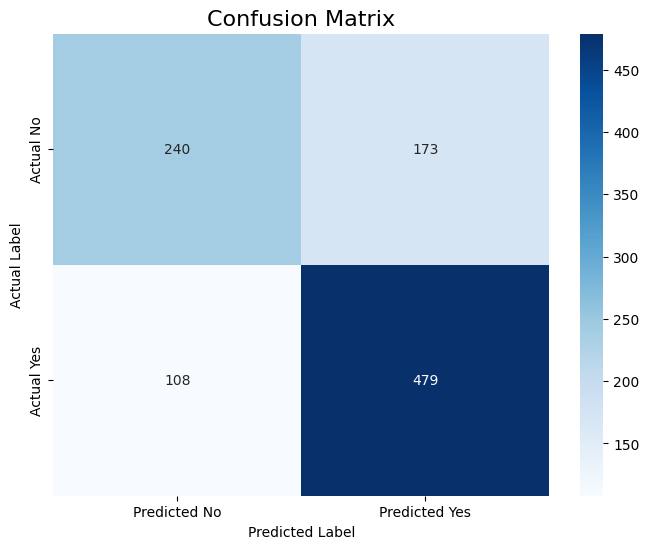

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Part 3: Training and Evaluating the Machine Learning Model ---")

df = pd.read_csv('Oral_Health_Lifestyle_Dataset.csv')

X = df.drop('Dental_Problems', axis=1)
y = df['Dental_Problems']

X_encoded = pd.get_dummies(X, columns=['Gender', 'Income_Level', 'Stress_Level', 'Oral_Hygiene_Frequency', 'Smoking_Status', 'Sugar_Consumption'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
print("✅ Model (Logistic Regression) has been successfully trained.")

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")
print("--------------------------------------------------")

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("--------------------------------------------------")

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Interactive Health Intelligence System
This final section brings our project to life. We will deploy the trained machine learning model into an interactive command-line application. This "Health Intelligence System" will act as a chatbot, asking a user for their information and providing a real-time risk assessment. The system features multiple modes, allowing users to get an overall risk score, see a personalized analysis of their most impactful habits, and even simulate lifestyle changes in a "what-if" scenario planner.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

class OralHealthAssessor:
    def __init__(self, data_file):
        print("--- Initializing the Health Intelligence System ---")
        try:
            df = pd.read_csv(data_file)
            print("Dataset loaded successfully.")
        except FileNotFoundError:
            print(f"FATAL ERROR: The dataset file '{data_file}' was not found.")
            exit()

        X = df.drop('Dental_Problems', axis=1)
        y = df['Dental_Problems']

        self.X_encoded_columns = pd.get_dummies(X, columns=['Gender', 'Income_Level', 'Stress_Level', 'Oral_Hygiene_Frequency', 'Smoking_Status', 'Sugar_Consumption'], drop_first=True).columns
        X_encoded = pd.get_dummies(X, columns=['Gender', 'Income_Level', 'Stress_Level', 'Oral_Hygiene_Frequency', 'Smoking_Status', 'Sugar_Consumption'], drop_first=True)

        X_train, _, y_train, _ = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

        self.scaler = StandardScaler()
        X_train_scaled = self.scaler.fit_transform(X_train)

        self.model = LogisticRegression(random_state=42)
        self.model.fit(X_train_scaled, y_train)
        print("✅ Model trained and system is ready.")
        print("---------------------------------------------------------")

    def _get_validated_input(self, prompt, valid_options, is_numeric=False):
        while True:
            user_input = input(prompt).strip()
            if is_numeric:
                try:
                    value = int(user_input)
                    if valid_options[0] <= value <= valid_options[1]:
                        return value
                    else:
                        print(f"Error: Please enter a number between {valid_options[0]} and {valid_options[1]}.")
                except ValueError:
                    print("Error: Please enter a valid number.")
            else:
                processed_input = ' '.join([word.capitalize() for word in user_input.replace('-', ' ').split()])
                if processed_input in valid_options:
                    return processed_input
                else:
                    print(f"Invalid input. Please choose from: {', '.join(valid_options)}")

    def _get_user_profile(self):
        print("\nPlease provide some information about yourself:")
        profile = {}
        profile['Age'] = self._get_validated_input("1. What is your age? ", [18, 100], is_numeric=True)
        profile['Gender'] = self._get_validated_input("2. Gender (Male / Female): ", ['Male', 'Female'])
        profile['Income_Level'] = self._get_validated_input("3. Income level (Low / Medium / High): ", ['Low', 'Medium', 'High'])
        profile['Stress_Level'] = self._get_validated_input("4. Typical stress level (Low / Medium / High): ", ['Low', 'Medium', 'High'])
        profile['Oral_Hygiene_Frequency'] = self._get_validated_input("5. Oral hygiene frequency (Rarely / Often / Daily): ", ['Rarely', 'Often', 'Daily'])
        profile['Smoking_Status'] = self._get_validated_input("6. Smoking status (Smoker / Former Smoker / Non-smoker): ", ['Smoker', 'Former Smoker', 'Non Smoker'])
        profile['Sugar_Consumption'] = self._get_validated_input("7. Sugar consumption (Low / Medium / High): ", ['Low', 'Medium', 'High'])
        return profile

    def _preprocess_and_predict(self, user_profile):
        user_df = pd.DataFrame([user_profile])
        user_encoded = pd.get_dummies(user_df)
        user_aligned = user_encoded.reindex(columns=self.X_encoded_columns, fill_value=0)
        user_scaled = self.scaler.transform(user_aligned)
        probability = self.model.predict_proba(user_scaled)[0][1]
        return probability

    def run_overall_assessment(self):
        print("\n--- Mode 1: Overall Risk Assessment ---")
        profile = self._get_user_profile()
        risk_prob = self._preprocess_and_predict(profile)

        print("\n-------------------- ASSESSMENT RESULT --------------------")
        print(f"Analyzing profile... calculated risk score: {risk_prob*100:.1f}%")

        if risk_prob < 0.25: print("RISK LEVEL: LOW. Your lifestyle habits are highly protective.")
        elif risk_prob < 0.50: print("RISK LEVEL: MODERATE. Your profile shows some risk factors.")
        elif risk_prob < 0.75: print("RISK LEVEL: HIGH. Several factors in your profile indicate a high risk.")
        else: print("RISK LEVEL: VERY HIGH. Your profile indicates a very strong likelihood of dental problems.")

        print("---------------------------------------------------------")

    def run_factor_impact_analysis(self):
        print("\n--- Mode 2: Personalized Factor Impact Analysis ---")
        profile = self._get_user_profile()
        base_risk = self._preprocess_and_predict(profile)
        print(f"\nYour baseline risk score is {base_risk*100:.1f}%.")
        print("Now, let's see what would happen if we improved each factor individually...")

        impacts = {}
        if profile['Oral_Hygiene_Frequency'] != 'Daily':
            temp_profile = profile.copy(); temp_profile['Oral_Hygiene_Frequency'] = 'Daily'; impacts['Improving Hygiene to "Daily"'] = base_risk - self._preprocess_and_predict(temp_profile)
        if profile['Smoking_Status'] == 'Smoker':
            temp_profile = profile.copy(); temp_profile['Smoking_Status'] = 'Non Smoker'; impacts['Quitting Smoking'] = base_risk - self._preprocess_and_predict(temp_profile)
        if profile['Stress_Level'] == 'High':
            temp_profile = profile.copy(); temp_profile['Stress_Level'] = 'Low'; impacts['Reducing Stress to "Low"'] = base_risk - self._preprocess_and_predict(temp_profile)

        if not impacts:
            print("\nYour lifestyle habits are already optimal! No major impact factors to analyze.")
            return

        most_impactful_factor = max(impacts, key=impacts.get)
        risk_reduction = impacts[most_impactful_factor]

        print("\n-------------------- IMPACT ANALYSIS RESULT --------------------")
        print(f"The SINGLE most impactful change you could make is:\n  >>> {most_impactful_factor} <<<")
        print(f"This change alone could reduce your risk score by approximately {risk_reduction*100:.1f} percentage points.")
        print("---------------------------------------------------------")

    def run_what_if_scenario(self):
        print("\n--- Mode 3: 'What-If' Scenario Planner ---")
        profile = self._get_user_profile()

        while True:
            base_risk = self._preprocess_and_predict(profile)
            print(f"\nYour CURRENT PROFILE risk score is: {base_risk*100:.1f}%")
            print("\nWhich factor would you like to change for a simulation?\n1. Smoking Status\n2. Oral Hygiene\n3. Stress Level\n4. Exit Planner")
            choice = self._get_validated_input("> ", ['1', '2', '3', '4'])

            if choice == '1': profile['Smoking_Status'] = self._get_validated_input("New Smoking Status (Smoker / Former Smoker / Non-smoker): ", ['Smoker', 'Former Smoker', 'Non Smoker'])
            elif choice == '2': profile['Oral_Hygiene_Frequency'] = self._get_validated_input("New Hygiene Frequency (Rarely / Often / Daily): ", ['Rarely', 'Often', 'Daily'])
            elif choice == '3': profile['Stress_Level'] = self._get_validated_input("New Stress Level (Low / Medium / High): ", ['Low', 'Medium', 'High'])
            elif choice == '4': break

        print("\nExiting Scenario Planner.")

    def start_menu(self):
        print("\n=========================================================")
        print("      Welcome to the Oral Health Intelligence System")
        print("=========================================================")
        print("\n*** DISCLAIMER: This is a tool based on a machine learning model. ***")
        print("*** It is NOT a substitute for professional medical advice.     ***")

        while True:
            print("\nPlease choose an assessment mode:")
            print("1. Overall Risk Assessment")
            print("2. Personalized Factor Impact Analysis")
            print("3. 'What-If' Scenario Planner")
            print("4. Exit")

            choice = self._get_validated_input("> ", ['1', '2', '3', '4'])

            if choice == '1': self.run_overall_assessment()
            elif choice == '2': self.run_factor_impact_analysis()
            elif choice == '3': self.run_what_if_scenario()
            elif choice == '4':
                print("\nThank you for using the system. Stay healthy!")
                break

if __name__ == "__main__":
    assessor = OralHealthAssessor(data_file='Oral_Health_Lifestyle_Dataset.csv')
    assessor.start_menu()

--- Initializing the Health Intelligence System ---
Dataset loaded successfully.
✅ Model trained and system is ready.
---------------------------------------------------------

      Welcome to the Oral Health Intelligence System

*** DISCLAIMER: This is a tool based on a machine learning model. ***
*** It is NOT a substitute for professional medical advice.     ***

Please choose an assessment mode:
1. Overall Risk Assessment
2. Personalized Factor Impact Analysis
3. 'What-If' Scenario Planner
4. Exit
